# Assignment 2A

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('letter-recognition.data', names=['letter','x-box','y-box','width','height','onpix','x-bar','y-bar',
                'x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx'])
df.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [8]:
df.columns

Index(['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar',
       'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy',
       'y-ege', 'yegvx'],
      dtype='object')

In [9]:
x = df.drop('letter', axis=1).values
y = df['letter'].values

In [10]:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

y_cat = to_categorical(y_enc)

In [11]:
scaler = StandardScaler()
x_scal = scaler.fit_transform(x)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scal, y_cat, test_size=0.2, random_state=42)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(16,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.3202 - loss: 2.5452 - val_accuracy: 0.7125 - val_loss: 1.0392
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7349 - loss: 0.9364 - val_accuracy: 0.7788 - val_loss: 0.7342
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8022 - loss: 0.6754 - val_accuracy: 0.8325 - val_loss: 0.5862
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8435 - loss: 0.5434 - val_accuracy: 0.8525 - val_loss: 0.4959
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8675 - loss: 0.4692 - val_accuracy: 0.8763 - val_loss: 0.4371
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8828 - loss: 0.4064 - val_accuracy: 0.8894 - val_loss: 0.3816
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9010 - loss: 0.3489 - val_accuracy: 0.9000 - val_loss: 0.3450
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9070 - loss: 0.3187 - val_ac

In [19]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy : {acc:.4f}")

Test accuracy : 0.9542


In [20]:
predictions = model.predict(x_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [21]:
predicted_classes = predictions.argmax(axis=1)
decoded_predictions = encoder.inverse_transform(predicted_classes)

true_classes = y_test.argmax(axis=1)
decoded_true_classes = encoder.inverse_transform(true_classes)

In [23]:
for i in range(10):
    print(f"Predicted : {decoded_predictions[i]}, True : {decoded_true_classes[i]}")

Predicted : X, True : T
Predicted : L, True : L
Predicted : A, True : A
Predicted : E, True : E
Predicted : Q, True : Q
Predicted : E, True : E
Predicted : O, True : O
Predicted : Q, True : Q
Predicted : G, True : G
Predicted : O, True : O


In [25]:
acc_percent = np.mean(decoded_predictions == decoded_true_classes) * 100
print(f"Accuracy : {acc_percent:.4f}%")

Accuracy : 95.4250%


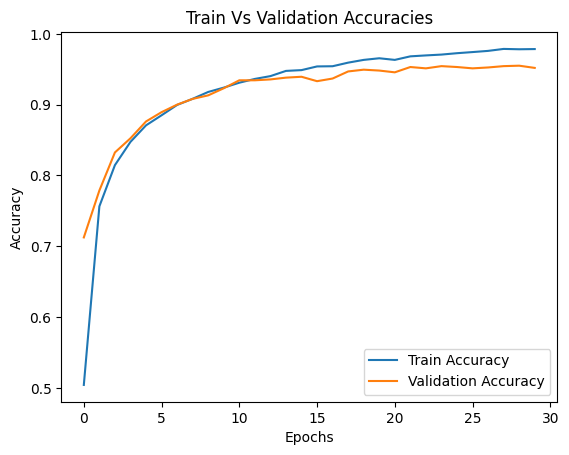

In [27]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train Vs Validation Accuracies")
plt.show()

# Assignment 2B

In [32]:
# 1. Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [34]:
# 2. Load the IMDB dataset (with raw text)
imdb = keras.datasets.imdb

# Set vocabulary size
vocab_size = 10000

# Load dataset (already preprocessed as integers)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [35]:
# 3. Decode function to get back text
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(text_ints):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text_ints])

In [36]:
# 4. Prepare data (pad sequences)
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [37]:
# 5. Build model
model = keras.Sequential([
    layers.Embedding(vocab_size, 64, input_length=maxlen),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
# 6. Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Train model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 338s 897ms/step - accuracy: 0.6789 - loss: 0.5718 - val_accuracy: 0.8652 - val_loss: 0.3224
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 173s 553ms/step - accuracy: 0.8995 - loss: 0.2533 - val_accuracy: 0.8606 - val_loss: 0.3255
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 207s 663ms/step - accuracy: 0.9329 - loss: 0.1790 - val_accuracy: 0.8674 - val_loss: 0.3394
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 174s 556ms/step - accuracy: 0.9571 - loss: 0.1210 - val_accuracy: 0.8330 - val_loss: 0.4714
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 275s 880ms/step - accuracy: 0.9684 - loss: 0.0920 - val_accuracy: 0.8472 - val_loss: 0.4493


In [43]:
# 8. Real-time testing function
def predict_sentiment_text(model, review_text):
    # 8.1 Preprocessing: convert review to integers
    words = review_text.lower().split()
    review_seq = []
    for word in words:
        idx = word_index.get(word, 2)  # 2 is for unknown words
        review_seq.append(idx)

    review_seq = pad_sequences([review_seq], maxlen=maxlen)

    pred = model.predict(review_seq, verbose=0)[0][0]
    sentiment = "Positive" if pred >= 0.6 else "Negative"
    print(f"\nReview Sentiment: {sentiment} (Score: {pred:.4f})")

In [44]:
# 9. Real examples
sample_review1 = "The movie was fantastic! I really loved the performances."
predict_sentiment_text(model, sample_review1)

sample_review2 = "The film was boring and too long. Not good at all."
predict_sentiment_text(model, sample_review2)

sample_review3 = "it is so disappointing."
predict_sentiment_text(model, sample_review3)

sample_review4 = "An excellent movie. Great direction and amazing acting!"
predict_sentiment_text(model, sample_review4)


Review Sentiment: Positive (Score: 0.8859)

Review Sentiment: Negative (Score: 0.5276)

Review Sentiment: Negative (Score: 0.5011)

Review Sentiment: Positive (Score: 0.6628)
